<a href="https://colab.research.google.com/github/566u43/Innobyte-internship/blob/main/InnoByteinternship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# This will prompt you to upload the file
uploaded = files.upload()


Saving Amazon Sale Report.csv to Amazon Sale Report.csv


In [ ]:
import pandas as pd

# Replace "Amazon Sale Report.csv" with the actual file name if different
df = pd.read_csv("Amazon Sale Report.csv")
df.head()  # Display the first few rows



,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [ ]:
# Data Cleaning
print("Missing values in each column:")
print(df.isnull().sum())

df.fillna(0, inplace=True)  # Fill missing values with 0

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=['Date'])

# Check the dataset summary after cleaning
df.info()


Missing values in each column:
index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128976 non-null  int64         
 1   Order ID            128976 non-null  object        
 2   Dat

<ipython-input-7-c813d22e4535>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


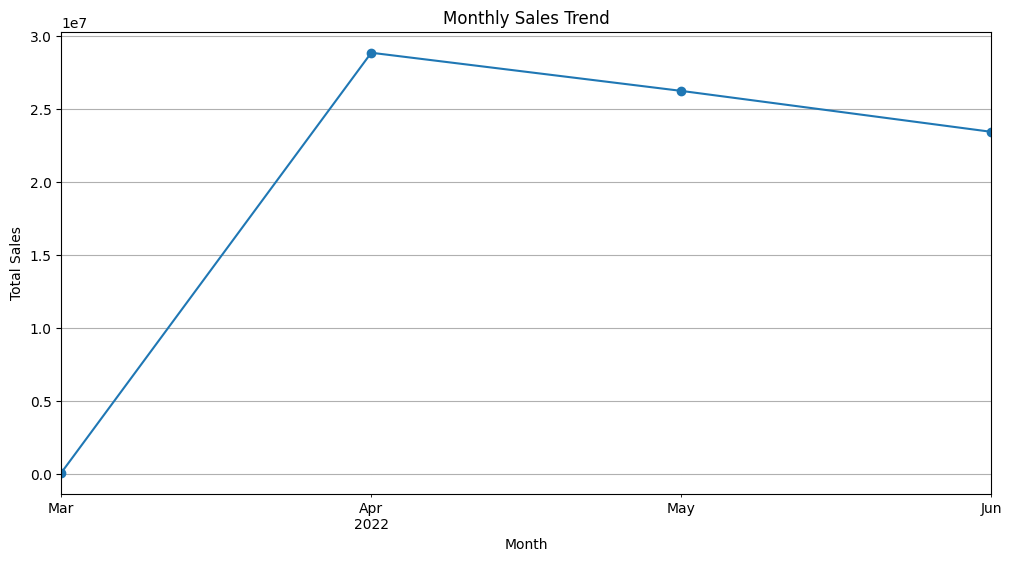

In [ ]:
# Monthly Sales Analysis
df['month'] = df['Date'].dt.to_period('M')  # Create month column
monthly_sales = df.groupby('month')['Amount'].sum()  # Group by month and sum sales

# Plot monthly sales trends
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()



In [ ]:
# Calculate summary metrics
total_sales = df['Amount'].sum()
average_order_value = df['Amount'].mean()
num_orders = df['Order ID'].nunique()

print("Total Sales:", total_sales)
print("Average Order Value:", average_order_value)
print("Number of Orders:", num_orders)



Total Sales: 78590170.24999997
Average Order Value: 609.3394914557745
Number of Orders: 120229


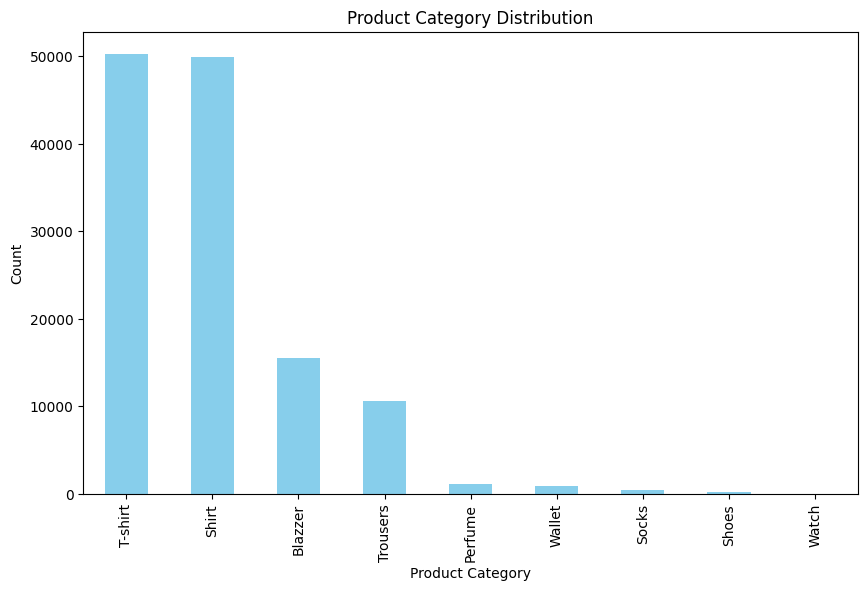

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ... (code to load your DataFrame)

try:
    # Count the sales by product category
    category_distribution = df['Category'].value_counts()

    # Plot category distribution
    plt.figure(figsize=(10, 6))
    category_distribution.plot(kind='bar', color='skyblue')
    plt.title('Product Category Distribution')
    plt.xlabel('Product Category')
    plt.ylabel('Count')
    plt.show()

except KeyError:
    print("Error: 'Category' column not found in the DataFrame.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

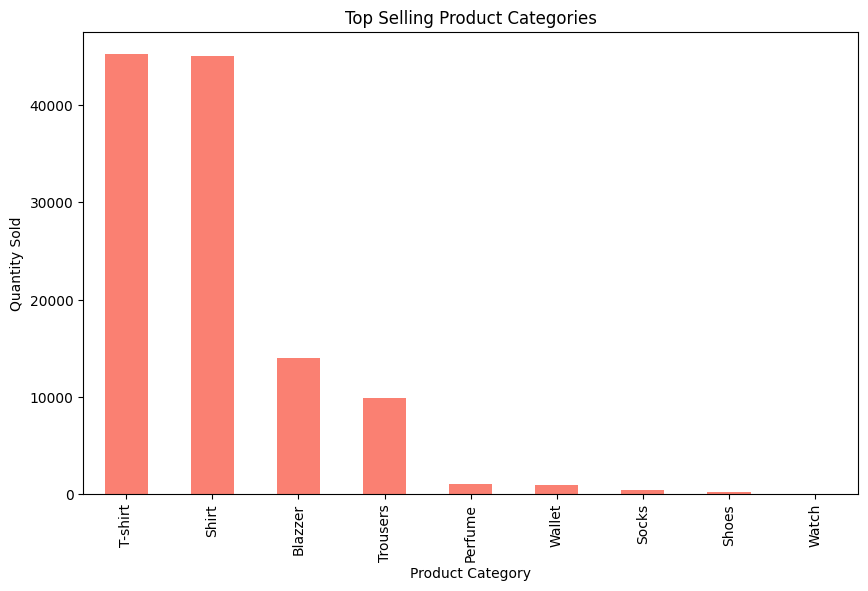

In [ ]:
# Aggregate quantity sold by product category
top_products = df.groupby('Category')['Qty'].sum().sort_values(ascending=False)

# Plot top-selling products
plt.figure(figsize=(10, 6))
top_products.head(10).plot(kind='bar', color='salmon')
plt.title('Top Selling Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Quantity Sold')
plt.show()


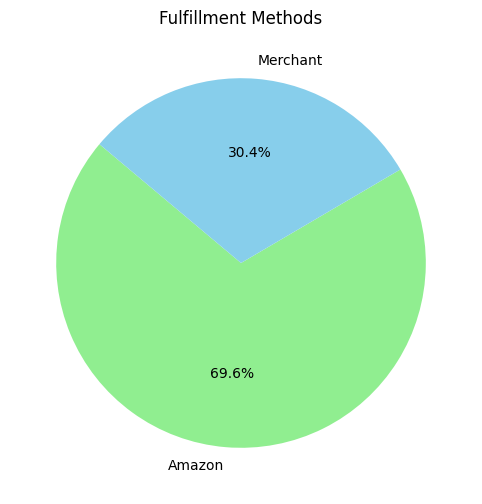

In [ ]:
# Analyze distribution of fulfillment methods
fulfillment_counts = df['Fulfilment'].value_counts()

# Plot fulfillment method distribution
plt.figure(figsize=(8, 6))
fulfillment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'skyblue', 'salmon'])
plt.title('Fulfillment Methods')
plt.ylabel('')
plt.show()


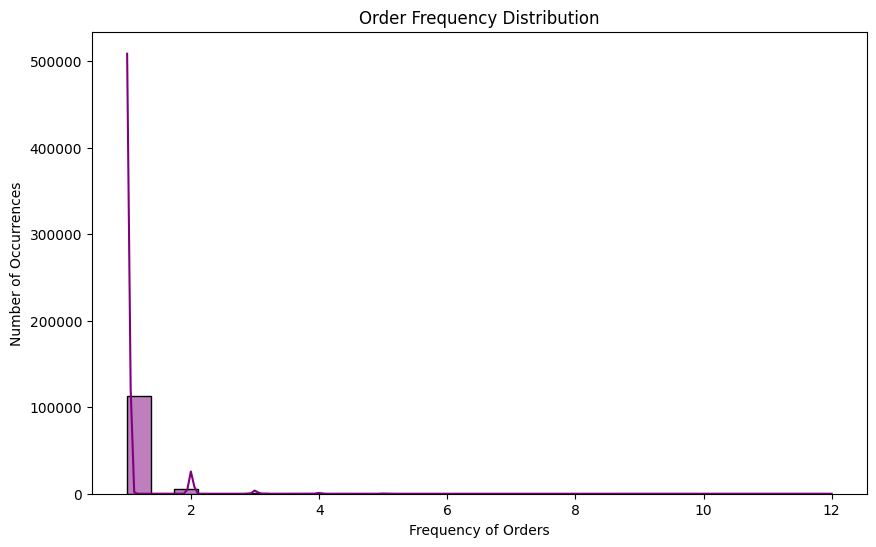

In [ ]:
# Count orders (if order_id represents unique orders)
order_frequency = df['Order ID'].value_counts()

# Plot order frequency
plt.figure(figsize=(10, 6))
sns.histplot(order_frequency, bins=30, kde=True, color='purple')
plt.title('Order Frequency Distribution')
plt.xlabel('Frequency of Orders')
plt.ylabel('Number of Occurrences')
plt.show()


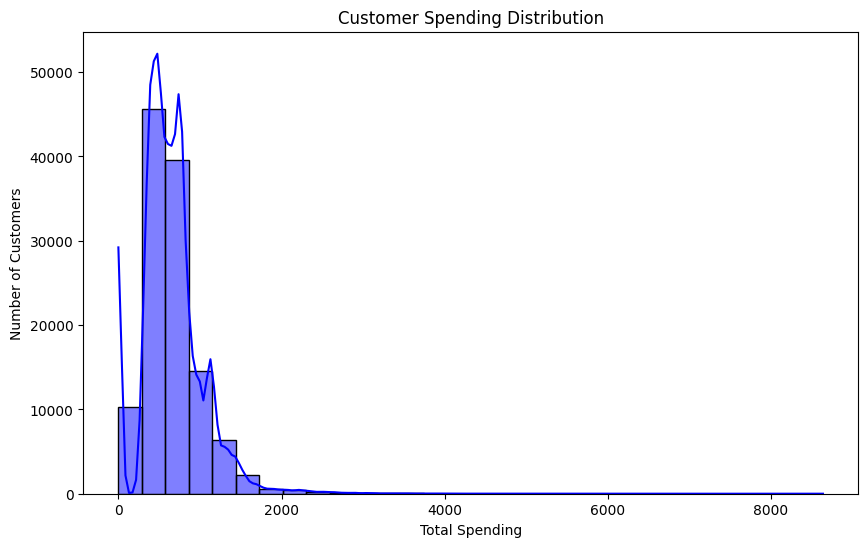

In [ ]:
# Calculate total amount spent per customer
customer_spending = df.groupby('Order ID')['Amount'].sum()

# Plot distribution of customer spending
plt.figure(figsize=(10, 6))
sns.histplot(customer_spending, bins=30, kde=True, color='blue')
plt.title('Customer Spending Distribution')
plt.xlabel('Total Spending')
plt.ylabel('Number of Customers')
plt.show()


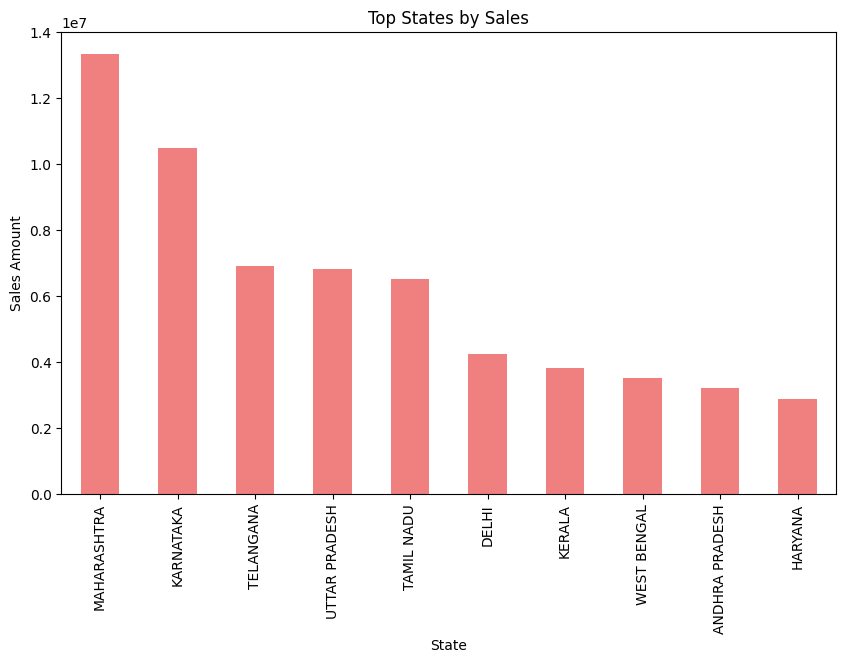

In [ ]:
# Aggregate sales by state
state_sales = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False)

# Plot top 10 states by sales
plt.figure(figsize=(10, 6))
state_sales.head(10).plot(kind='bar', color='lightcoral')
plt.title('Top States by Sales')
plt.xlabel('State')
plt.ylabel('Sales Amount')
plt.show()


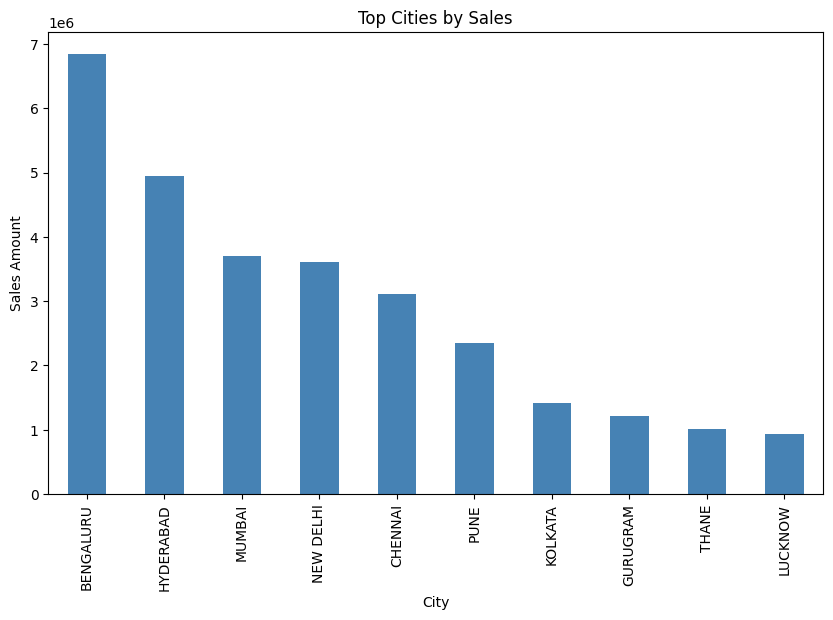

In [ ]:
# Aggregate sales by city
city_sales = df.groupby('ship-city')['Amount'].sum().sort_values(ascending=False)

# Plot top 10 cities by sales
plt.figure(figsize=(10, 6))
city_sales.head(10).plot(kind='bar', color='steelblue')
plt.title('Top Cities by Sales')
plt.xlabel('City')
plt.ylabel('Sales Amount')
plt.show()


In [ ]:
# Example: save the monthly sales trends plot
plt.savefig('monthly_sales_trends.png')


<Figure size 640x480 with 0 Axes>